In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [177]:
dataset = pd.read_csv("1D.csv")
dataset = dataset.iloc[11:, :]*10**5 - 127873
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[  8333.   8448.   9324. ... -15591. -15825. -16528.]
[  8449.   9324.   8833. ... -15824. -16529. -16591.]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 

In [178]:
print(max(dataset.iloc[:, 1:].max()))
print(min(dataset.iloc[:, 1:].min()))

32516.0
-32516.0


# Find high value by open value

In [179]:
x = dataset.iloc[:, 1:35]
y = dataset.iloc[:,   35]
x = x.values
y = y.values
y = y.reshape(len(y),1)
print(x)
print(y)

[[  9981.  10146.   9730. ...   9648.   8366.   8333.]
 [  9861.  10101.   9707. ...   8542.   8185.   8448.]
 [ 10059.  10437.   9692. ...   9401.   8302.   9324.]
 ...
 [-19319. -18867. -19536. ... -15117. -15784. -15591.]
 [-18978. -18142. -19204. ... -15473. -16131. -15825.]
 [-18280. -18176. -18310. ... -15582. -16689. -16528.]]
[[  8542.]
 [  9401.]
 [  9367.]
 ...
 [-15473.]
 [-15582.]
 [-16424.]]


In [180]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [181]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[  8731.26   8542.  ]
 [  8844.48   9401.  ]
 [  9503.87   9367.  ]
 ...
 [-15442.79 -15473.  ]
 [-15534.67 -15582.  ]
 [-16378.23 -16424.  ]]


In [182]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998387770179731

In [183]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1022.6237182617188
130.01852769537993


# Find next low

In [184]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[  9981.    10146.     9730.   ...   8366.     8333.     8731.26]
 [  9861.    10101.     9707.   ...   8185.     8448.     8844.48]
 [ 10059.    10437.     9692.   ...   8302.     9324.     9503.87]
 ...
 [-19319.   -18867.   -19536.   ... -15784.   -15591.   -15442.79]
 [-18978.   -18142.   -19204.   ... -16131.   -15825.   -15534.67]
 [-18280.   -18176.   -18310.   ... -16689.   -16528.   -16378.23]]


In [185]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[  8185.]
 [  8302.]
 [  8763.]
 ...
 [-16131.]
 [-16689.]
 [-16660.]]


In [186]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [187]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[  8168.79   8185.  ]
 [  8143.55   8302.  ]
 [  8915.31   8763.  ]
 ...
 [-16100.35 -16131.  ]
 [-16449.8  -16689.  ]
 [-16878.25 -16660.  ]]


In [188]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998516971227537

In [189]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

973.2402343750146
123.83009125999946


# Find close

In [190]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[  9981.    10146.     9730.   ...   8333.     8731.26   8168.79]
 [  9861.    10101.     9707.   ...   8448.     8844.48   8143.55]
 [ 10059.    10437.     9692.   ...   9324.     9503.87   8915.31]
 ...
 [-19319.   -18867.   -19536.   ... -15591.   -15442.79 -16100.35]
 [-18978.   -18142.   -19204.   ... -15825.   -15534.67 -16449.8 ]
 [-18280.   -18176.   -18310.   ... -16528.   -16378.23 -16878.25]]


In [191]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[  8449.]
 [  9324.]
 [  8833.]
 ...
 [-15824.]
 [-16529.]
 [-16591.]]


In [192]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [193]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[  8397.77   8449.  ]
 [  8963.27   9324.  ]
 [  8956.32   8833.  ]
 ...
 [-15819.41 -15824.  ]
 [-16451.67 -16529.  ]
 [-16550.98 -16591.  ]]


In [194]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9998606404049839

In [195]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

837.1708984374854
119.6883992900896


# Checking ascending

In [196]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
x = np.concatenate((x, yPredClose.reshape(len(yPredClose), 1)), 1)
print(x)

[[  9981.    10146.     9730.   ...   8731.26   8168.79   8397.77]
 [  9861.    10101.     9707.   ...   8844.48   8143.55   8963.27]
 [ 10059.    10437.     9692.   ...   9503.87   8915.31   8956.32]
 ...
 [-19319.   -18867.   -19536.   ... -15442.79 -16100.35 -15819.41]
 [-18978.   -18142.   -19204.   ... -15534.67 -16449.8  -16451.67]
 [-18280.   -18176.   -18310.   ... -16378.23 -16878.25 -16550.98]]


In [197]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[2406   31]
 [  27 2537]]


0.9884023195360928

In [199]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(5001,)
[[2177  260]
 [ 270 2294]]


0.8940211957608478

In [200]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [201]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

      high error   low error  close error
0     189.261719   16.208984    51.232422
1     556.516602  158.447754   360.725586
2     136.867188  152.311523   123.322266
3       4.389648  106.071289    47.838867
4       3.999023  134.645508   244.700195
...          ...         ...          ...
4996   10.206055   99.530273    21.273437
4997   20.410156   14.027344     7.722656
4998   30.207031   30.646484     4.587891
4999   47.333008  239.201172    77.328125
5000   45.773438  218.246094    40.015625

[5001 rows x 3 columns]


In [202]:
x = []
for i in range(5001):
    x.append(i)

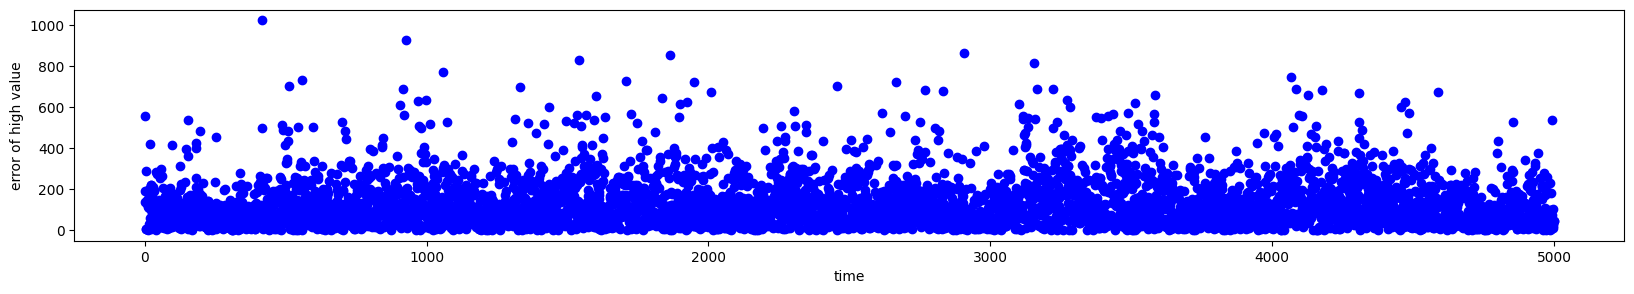

In [203]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [204]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

2514


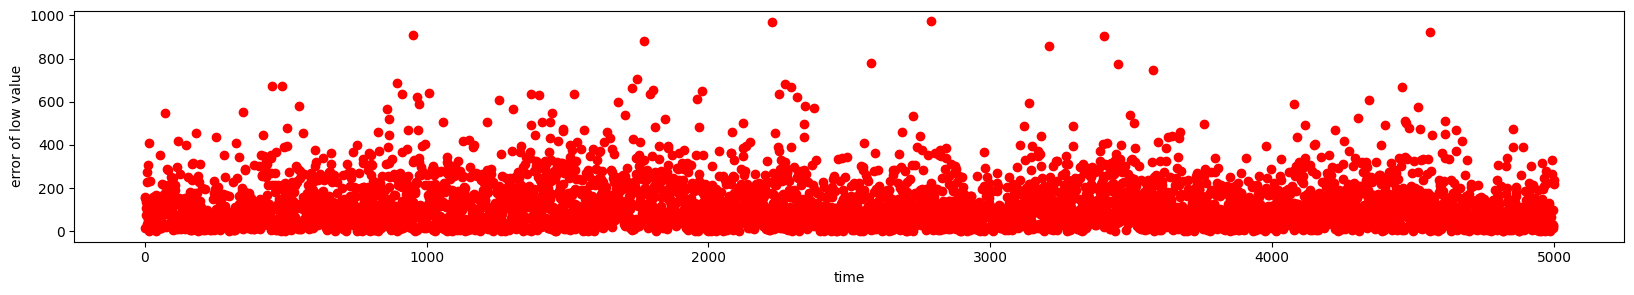

In [205]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [206]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

2611


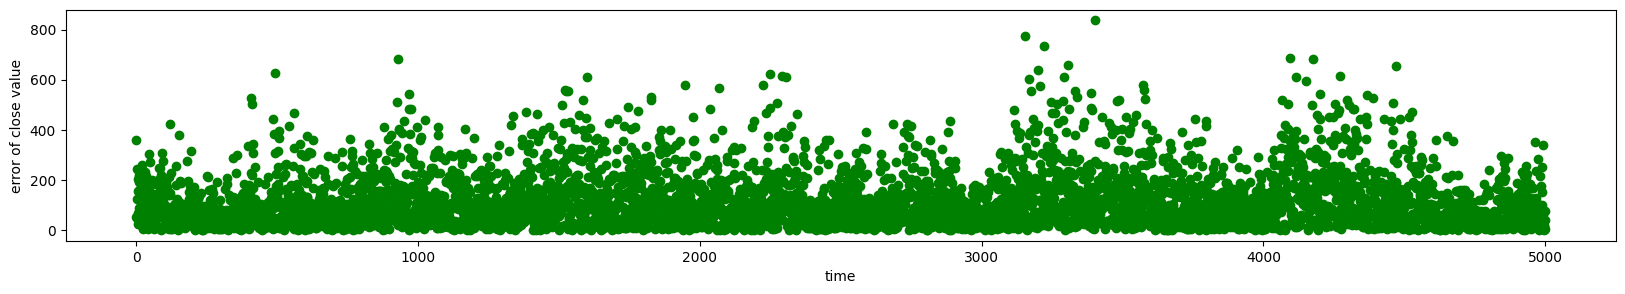

In [207]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [208]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

2751


In [209]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 50.26994601079784
percent of under 100 for low is 52.20955808838232
percent of under 100 for close is 55.008998200359926


In [210]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 79.24415116976604
percent of under 200 for low is 80.96380723855229
percent of under 200 for close is 81.62367526494701


In [211]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 67.22655468906218
percent of under 150 for low is 69.46610677864427
percent of under 150 for close is 71.125774845031
